In [44]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [132]:
def make_cifar10(batch_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    
    return trainset, trainloader, testset, testloader

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [119]:
print(len(trainset[0]))
print(type(trainset))


2
torchvision.datasets.cifar.CIFAR10


Files already downloaded and verified
Files already downloaded and verified


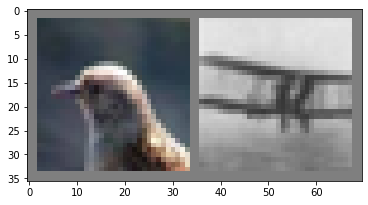

In [136]:
# 학습데이터 가져오기
trainset, trainloader, testset, testloader= make_cifar10(2)

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [120]:
trainset.

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [47]:
images[0].shape

torch.Size([3, 32, 32])

In [114]:
import torch

def add_gaussian_noise(image, stddev=0.2):
    """
    Add Gaussian noise to an image tensor.

    Args:
        image (torch.Tensor): Input image tensor (batch_size x channels x height x width).
        stddev (float): Standard deviation of the Gaussian noise.

    Returns:
        torch.Tensor: Noisy image tensor with values clamped between 0 and 1.
    """
    # Generate random noise with the same size as the image
    noise = torch.randn_like(image) * stddev

    # Add the noise to the image
    noisy_image = image + noise

    # Clip the pixel values to be in the range [0, 1]
    noisy_image = torch.clamp(noisy_image, 0, 1)

    return noisy_image

In [56]:
def compare_image(original_image, noisy_image, prediction_image):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Prediction_image")
    plt.imshow(prediction_image.squeeze().permute(1, 2, 0).numpy())
    plt.axis('off')

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


len(batch):  2
batch[0]:  tensor([[[[ 0.1373,  0.2157,  0.2314,  ...,  0.0980,  0.1294,  0.1529],
          [ 0.0196, -0.0196,  0.1451,  ..., -0.3176, -0.1765,  0.0196],
          [-0.1059, -0.1137,  0.0039,  ..., -0.4980, -0.3569, -0.2000],
          ...,
          [ 0.5843,  0.6157,  0.6235,  ..., -0.0431, -0.1059, -0.0275],
          [ 0.5529,  0.6235,  0.6157,  ..., -0.2549, -0.1451,  0.0745],
          [ 0.5529,  0.5765,  0.6078,  ...,  0.1686,  0.4667,  0.6392]],

         [[ 0.4275,  0.4980,  0.5137,  ...,  0.3647,  0.3804,  0.3961],
          [ 0.2627,  0.2392,  0.4118,  ..., -0.0588,  0.0667,  0.2314],
          [ 0.1059,  0.1294,  0.2706,  ..., -0.2784, -0.1373,  0.0196],
          ...,
          [ 0.3961,  0.4196,  0.4353,  ..., -0.2078, -0.2863, -0.2078],
          [ 0.3490,  0.4118,  0.4039,  ..., -0.4196, -0.3176, -0.0980],
          [ 0.3176,  0.3333,  0.3725,  ..., -0.0196,  0.2627,  0.4275]],

         [[ 0.8275,  0.9216,  0.9529,  ...,  0.7176,  0.7961,  0.8824],
    

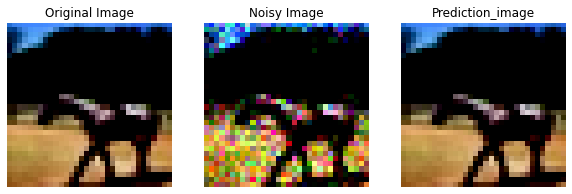

In [145]:
i = 0
for batch in trainloader:
    if i== 1:
        break
    # print("batch : ", batch)
    print("len(batch): ",len(batch))
    print("batch[0]: ",batch[0])
    print("batch[1]: ",batch[1])
    print("batch[0].shape: ",batch[0].shape)
    print("type(batch[0]): ",type(batch[0]))
    print("batch[1].shape: ",batch[1].shape)
    # images, true_masks = batch, add_gaussian_noise(batch[0])
    images, true_masks = batch[0], [add_gaussian_noise(image) for image in batch[0]]
    compare_image(images[0], true_masks[0], images[0])
    i += 1

In [131]:
i = 0
for batch in trainloader:
    if i== 1:
        break
    # print("batch : ", batch)
    print("len(batch): ",len(batch))
    print("batch[0]: ",batch[0])
    print("batch[1]: ",batch[1])
    print("batch[0].shape: ",batch[0].shape)
    print("type(batch[0]): ",type(batch[0]))
    print("batch[1].shape: ",batch[1].shape)
    # images, true_masks = batch, add_gaussian_noise(batch[0])
    images, true_masks = batch, [add_gaussian_noise(image[0]) for image in batch]
    # compare_image(images, true_masks, images)
    i += 1

len(batch):  2
batch[0]:  tensor([[[[-0.4588, -0.5059, -0.5137,  ..., -0.9529, -0.9529, -0.9608],
          [-0.4824, -0.4745, -0.4588,  ..., -0.9529, -0.9529, -0.9529],
          [-0.4588, -0.4588, -0.4353,  ..., -0.9451, -0.9451, -0.9294],
          ...,
          [ 0.0118, -0.0353, -0.0039,  ...,  0.3647,  0.4431,  0.4588],
          [ 0.0510,  0.0667,  0.0588,  ...,  0.1451,  0.3569,  0.4980],
          [-0.0039,  0.0353,  0.0667,  ..., -0.1137,  0.2549,  0.5373]],

         [[-0.5373, -0.5686, -0.5216,  ..., -0.9529, -0.9529, -0.9529],
          [-0.5686, -0.5451, -0.4588,  ..., -0.9529, -0.9529, -0.9529],
          [-0.5608, -0.5294, -0.4275,  ..., -0.9451, -0.9451, -0.9216],
          ...,
          [-0.1137, -0.1529, -0.1216,  ...,  0.3333,  0.4039,  0.4196],
          [-0.0745, -0.0588, -0.0745,  ...,  0.1137,  0.3176,  0.4588],
          [-0.1216, -0.0980, -0.0824,  ..., -0.1451,  0.2157,  0.4980]],

         [[-0.7020, -0.7333, -0.7098,  ..., -0.9529, -0.9529, -0.9529],
    

RuntimeError: "normal_kernel_cpu" not implemented for 'Long'

In [146]:
import argparse
import logging
import os
import random
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from pathlib import Path
from torch import optim
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

import wandb
from evaluate import evaluate
from unet import UNet
from utils.data_loading import BasicDataset, CarvanaDataset
from utils.dice_score import dice_loss

dir_img = Path('./data/imgs/')
dir_mask = Path('./data/masks/')
dir_checkpoint = Path('./checkpoints/')


def train_model(
        model,
        device,
        epochs: int = 5,
        batch_size: int = 1,
        learning_rate: float = 1e-5,
        val_percent: float = 0.1,
        save_checkpoint: bool = True,
        img_scale: float = 0.5,
        amp: bool = False,
        weight_decay: float = 1e-8,
        momentum: float = 0.999,
        gradient_clipping: float = 1.0,
):
    # 1. Create dataset
    train_set, trainloader, val_set, val_loader = make_cifar10(batch_size)

    # (Initialize logging)
    # experiment = wandb.init(project='U-Net', resume='allow', anonymous='must')
    # experiment.config.update(
    #     dict(epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
    #          val_percent=val_percent, save_checkpoint=save_checkpoint, img_scale=img_scale, amp=amp)
    # )

    # logging.info(f'''Starting training:
    #     Epochs:          {epochs}
    #     Batch size:      {batch_size}
    #     Learning rate:   {learning_rate}
    #     Training size:   {n_train}
    #     Validation size: {n_val}
    #     Checkpoints:     {save_checkpoint}
    #     Device:          {device.type}
    #     Images scaling:  {img_scale}
    #     Mixed Precision: {amp}
    # ''')

    # 4. Set up the optimizer, the loss, the learning rate scheduler and the loss scaling for AMP
    optimizer = optim.Adam(model.parameters(),
                              lr=learning_rate, weight_decay=weight_decay, momentum=momentum, foreach=True)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=5)  # goal: maximize Dice score
    grad_scaler = torch.cuda.amp.GradScaler(enabled=amp)
    criterion = nn.CrossEntropyLoss() if model.n_classes > 1 else nn.BCEWithLogitsLoss()
    global_step = 0

    # 5. Begin training
    for epoch in range(1, epochs + 1):
        model.train()
        epoch_loss = 0
        with tqdm(total=n_train, desc=f'Epoch {epoch}/{epochs}', unit='img') as pbar:
            for batch in train_loader:
                images, true_masks = batch['image'], batch['image']

                assert images.shape[1] == model.n_channels, \
                    f'Network has been defined with {model.n_channels} input channels, ' \
                    f'but loaded images have {images.shape[1]} channels. Please check that ' \
                    'the images are loaded correctly.'

                images = images.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
                true_masks = true_masks.to(device=device, dtype=torch.long)

                with torch.autocast(device.type if device.type != 'mps' else 'cpu', enabled=amp):
                    masks_pred = model(images)
                    if model.n_classes == 1:
                        loss = criterion(masks_pred.squeeze(1), true_masks.float())
                        loss += dice_loss(F.sigmoid(masks_pred.squeeze(1)), true_masks.float(), multiclass=False)
                    else:
                        loss = criterion(masks_pred, true_masks)
                        loss += dice_loss(
                            F.softmax(masks_pred, dim=1).float(),
                            F.one_hot(true_masks, model.n_classes).permute(0, 3, 1, 2).float(),
                            multiclass=True
                        )

                optimizer.zero_grad(set_to_none=True)
                grad_scaler.scale(loss).backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clipping)
                grad_scaler.step(optimizer)
                grad_scaler.update()

                pbar.update(images.shape[0])
                global_step += 1
                epoch_loss += loss.item()
                experiment.log({
                    'train loss': loss.item(),
                    'step': global_step,
                    'epoch': epoch
                })
                pbar.set_postfix(**{'loss (batch)': loss.item()})

                # Evaluation round
                division_step = (n_train // (5 * batch_size))
                if division_step > 0:
                    if global_step % division_step == 0:
                        histograms = {}
                        for tag, value in model.named_parameters():
                            tag = tag.replace('/', '.')
                            if not (torch.isinf(value) | torch.isnan(value)).any():
                                histograms['Weights/' + tag] = wandb.Histogram(value.data.cpu())
                            if not (torch.isinf(value.grad) | torch.isnan(value.grad)).any():
                                histograms['Gradients/' + tag] = wandb.Histogram(value.grad.data.cpu())

                        val_score = evaluate(model, val_loader, device, amp)
                        scheduler.step(val_score)

                        logging.info('Validation Dice score: {}'.format(val_score))
                        try:
                            experiment.log({
                                'learning rate': optimizer.param_groups[0]['lr'],
                                'validation Dice': val_score,
                                'images': wandb.Image(images[0].cpu()),
                                'masks': {
                                    'true': wandb.Image(true_masks[0].float().cpu()),
                                    'pred': wandb.Image(masks_pred.argmax(dim=1)[0].float().cpu()),
                                },
                                'step': global_step,
                                'epoch': epoch,
                                **histograms
                            })
                        except:
                            pass

        if save_checkpoint:
            Path(dir_checkpoint).mkdir(parents=True, exist_ok=True)
            state_dict = model.state_dict()
            state_dict['mask_values'] = dataset.mask_values
            torch.save(state_dict, str(dir_checkpoint / 'checkpoint_epoch{}.pth'.format(epoch)))
            logging.info(f'Checkpoint {epoch} saved!')


def get_args():
    parser = argparse.ArgumentParser(description='Train the UNet on images and target masks')
    parser.add_argument('--epochs', '-e', metavar='E', type=int, default=5, help='Number of epochs')
    parser.add_argument('--batch-size', '-b', dest='batch_size', metavar='B', type=int, default=1, help='Batch size')
    parser.add_argument('--learning-rate', '-l', metavar='LR', type=float, default=1e-5,
                        help='Learning rate', dest='lr')
    parser.add_argument('--load', '-f', type=str, default=False, help='Load model from a .pth file')
    parser.add_argument('--scale', '-s', type=float, default=0.5, help='Downscaling factor of the images')
    parser.add_argument('--validation', '-v', dest='val', type=float, default=10.0,
                        help='Percent of the data that is used as validation (0-100)')
    parser.add_argument('--amp', action='store_true', default=False, help='Use mixed precision')
    parser.add_argument('--bilinear', action='store_true', default=False, help='Use bilinear upsampling')
    parser.add_argument('--classes', '-c', type=int, default=2, help='Number of classes')

    return parser.parse_args()


if __name__ == '__main__':
    args = get_args()

    logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    logging.info(f'Using device {device}')

    # Change here to adapt to your data
    # n_channels=3 for RGB images
    # n_classes is the number of probabilities you want to get per pixel
    model = UNet(n_channels=3, n_classes=args.classes, bilinear=args.bilinear)
    model = model.to(memory_format=torch.channels_last)

    logging.info(f'Network:\n'
                 f'\t{model.n_channels} input channels\n'
                 f'\t{model.n_classes} output channels (classes)\n'
                 f'\t{"Bilinear" if model.bilinear else "Transposed conv"} upscaling')

    if args.load:
        state_dict = torch.load(args.load, map_location=device)
        del state_dict['mask_values']
        model.load_state_dict(state_dict)
        logging.info(f'Model loaded from {args.load}')

    model.to(device=device)
    try:
        train_model(
            model=model,
            epochs=args.epochs,
            batch_size=args.batch_size,
            learning_rate=args.lr,
            device=device,
            img_scale=args.scale,
            val_percent=args.val / 100,
            amp=args.amp
        )
    except torch.cuda.OutOfMemoryError:
        logging.error('Detected OutOfMemoryError! '
                      'Enabling checkpointing to reduce memory usage, but this slows down training. '
                      'Consider enabling AMP (--amp) for fast and memory efficient training')
        torch.cuda.empty_cache()
        model.use_checkpointing()
        train_model(
            model=model,
            epochs=args.epochs,
            batch_size=args.batch_size,
            learning_rate=args.lr,
            device=device,
            img_scale=args.scale,
            val_percent=args.val / 100,
            amp=args.amp
        )


ModuleNotFoundError: No module named 'tqdm'